In [ ]:
print("1.Google\n2.Apple\n3.Amazon\n4.Tesla\n5.Exit")
a=int(input("Enter your choice of company. "))
if a==1:
    #show stock prices of google
    cmpny='GOOGL'
elif a==2:
    #show stock prices of apple
    cmpny='AAPL'
elif a==3:
    #show stock prices of amazon
    cmpny='AMZN'
elif a==4:
    #show stock prices of tesla
    cmpny='TSLA'
elif a==5:
    print("thank you")
else:
    print("invalid choice")

1.Google
2.Apple
3.Amazon
4.Tesla
5.Exit


In [ ]:
### Data Collection
import pandas_datareader as pdr
df=pdr.DataReader(cmpny, data_source='yahoo', start='2015-01-01', end='2021-01-23')
df.to_csv('cmpny.csv')
import pandas as pd
df=pd.read_csv('cmpny.csv')
df1=df.filter(['Close'])


In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [6]:
##s dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:traininplittingg_size,:],df1[training_size:len(df1),:1]
print(training_size, test_size)


991 535


In [7]:
train_data

array([[0.01849907],
       [0.01777076],
       [0.01560463],
       [0.0158842 ],
       [0.01580667],
       [0.01572915],
       [0.01479879],
       [0.01375331],
       [0.01423258],
       [0.01151669],
       [0.01132405],
       [0.01160597],
       [0.01133814],
       [0.01242826],
       [0.0136147 ],
       [0.01353717],
       [0.01477295],
       [0.01463903],
       [0.01308609],
       [0.01445578],
       [0.01407988],
       [0.01580432],
       [0.01754757],
       [0.01759221],
       [0.01816546],
       [0.01731263],
       [0.01734082],
       [0.01706125],
       [0.01624131],
       [0.01391072],
       [0.01411982],
       [0.01425608],
       [0.01428192],
       [0.01598523],
       [0.0172539 ],
       [0.01495854],
       [0.01419969],
       [0.01411746],
       [0.0149233 ],
       [0.01401879],
       [0.01260681],
       [0.01313072],
       [0.01380734],
       [0.01338211],
       [0.01179627],
       [0.01109145],
       [0.01095989],
       [0.011

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape), print(y_train.shape)

(840, 150)
(840,)


(None, None)

In [11]:
print(X_test.shape), print(ytest.shape)

(384, 150)
(384,)


(None, None)

In [12]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=155,batch_size=64,verbose=1)

Train on 840 samples, validate on 384 samples
Epoch 1/155
840/840 [==============================] - 16s 19ms/sample - loss: 3.1301e-04 - val_loss: 0.0696
Epoch 2/155
840/840 [==============================] - 7s 8ms/sample - loss: 1.4292e-04 - val_loss: 0.0465
Epoch 3/155
840/840 [==============================] - 7s 8ms/sample - loss: 6.7198e-05 - val_loss: 0.0078
Epoch 4/155
840/840 [==============================] - 7s 8ms/sample - loss: 3.4312e-05 - val_loss: 0.0097
Epoch 5/155
840/840 [==============================] - 7s 8ms/sample - loss: 3.2443e-05 - val_loss: 0.0075
Epoch 6/155
840/840 [==============================] - 7s 8ms/sample - loss: 3.3564e-05 - val_loss: 0.0091
Epoch 7/155
840/840 [==============================] - 7s 9ms/sample - loss: 2.9543e-05 - val_loss: 0.0069
Epoch 8/155
840/840 [==============================] - 8s 9ms/sample - loss: 2.4469e-05 - val_loss: 0.0062
Epoch 9/155
840/840 [==============================] - 8s 9ms/sample - loss: 2.3311e-05 - val_lo

840/840 [==============================] - 7s 9ms/sample - loss: 7.9688e-06 - val_loss: 0.0016
Epoch 152/155
840/840 [==============================] - 8s 9ms/sample - loss: 6.2677e-06 - val_loss: 0.0025
Epoch 153/155
840/840 [==============================] - 8s 9ms/sample - loss: 4.4185e-06 - val_loss: 0.0027
Epoch 154/155
840/840 [==============================] - 8s 9ms/sample - loss: 4.2161e-06 - val_loss: 0.0024
Epoch 155/155
840/840 [==============================] - 8s 9ms/sample - loss: 4.2955e-06 - val_loss: 0.0021


In [17]:
import tensorflow as tf

In [18]:
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.02608940089539

In [20]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

279.4774221566807

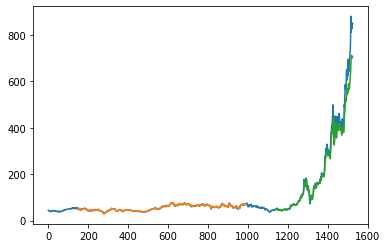

In [53]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
len(test_data)

535

In [57]:
x_input=test_data[385:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
#prediction
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.79763734]
151
1 day input [0.19985057 0.20160322 0.19198718 0.19789119 0.19172639 0.2033817
 0.21993549 0.22929073 0.25020732 0.28848355 0.2927782  0.28714438
 0.29381663 0.32914436 0.31796362 0.32260131 0.32946388 0.31880471
 0.31885171 0.35225059 0.33471476 0.34034625 0.32172502 0.29915444
 0.32795795 0.31313096 0.31844525 0.31571526 0.30238721 0.31513028
 0.31560015 0.31513497 0.31620628 0.3075441  0.29952329 0.2891437
 0.33151959 0.34708195 0.35406196 0.39750916 0.40959677 0.40758568
 0.43655362 0.44786593 0.43945982 0.44160716 0.47210925 0.4922153
 0.48625959 0.55161955 0.52428441 0.49176891 0.44434654 0.45764408
 0.35414183 0.39651303 0.40245698 0.40407806 0.45917117 0.49457644
 0.48517889 0.46364675 0.48563701 0.49414181 0.46458652 0.4130527
 0.4217807  0.44474594 0.4610272  0.4585251  0.47020156 0.49269692
 0.45384981 0.46628981 0.45254592 0.46584342 0.46657176 0.47606326
 0.4858132  0.49092313 0.50813238 0.49354271 0.48272379 0.47233947
 0.46189646 0.46271876 0.46641904 0.4

8 day output [[0.3999593]]
9 day input [0.25020732 0.28848355 0.2927782  0.28714438 0.29381663 0.32914436
 0.31796362 0.32260131 0.32946388 0.31880471 0.31885171 0.35225059
 0.33471476 0.34034625 0.32172502 0.29915444 0.32795795 0.31313096
 0.31844525 0.31571526 0.30238721 0.31513028 0.31560015 0.31513497
 0.31620628 0.3075441  0.29952329 0.2891437  0.33151959 0.34708195
 0.35406196 0.39750916 0.40959677 0.40758568 0.43655362 0.44786593
 0.43945982 0.44160716 0.47210925 0.4922153  0.48625959 0.55161955
 0.52428441 0.49176891 0.44434654 0.45764408 0.35414183 0.39651303
 0.40245698 0.40407806 0.45917117 0.49457644 0.48517889 0.46364675
 0.48563701 0.49414181 0.46458652 0.4130527  0.4217807  0.44474594
 0.4610272  0.4585251  0.47020156 0.49269692 0.45384981 0.46628981
 0.45254592 0.46584342 0.46657176 0.47606326 0.4858132  0.49092313
 0.50813238 0.49354271 0.48272379 0.47233947 0.46189646 0.46271876
 0.46641904 0.46035762 0.45994647 0.46511511 0.44319533 0.4488456
 0.42207437 0.4367228  0

16 day output [[0.28259215]]
17 day input [0.32946388 0.31880471 0.31885171 0.35225059 0.33471476 0.34034625
 0.32172502 0.29915444 0.32795795 0.31313096 0.31844525 0.31571526
 0.30238721 0.31513028 0.31560015 0.31513497 0.31620628 0.3075441
 0.29952329 0.2891437  0.33151959 0.34708195 0.35406196 0.39750916
 0.40959677 0.40758568 0.43655362 0.44786593 0.43945982 0.44160716
 0.47210925 0.4922153  0.48625959 0.55161955 0.52428441 0.49176891
 0.44434654 0.45764408 0.35414183 0.39651303 0.40245698 0.40407806
 0.45917117 0.49457644 0.48517889 0.46364675 0.48563701 0.49414181
 0.46458652 0.4130527  0.4217807  0.44474594 0.4610272  0.4585251
 0.47020156 0.49269692 0.45384981 0.46628981 0.45254592 0.46584342
 0.46657176 0.47606326 0.4858132  0.49092313 0.50813238 0.49354271
 0.48272379 0.47233947 0.46189646 0.46271876 0.46641904 0.46035762
 0.45994647 0.46511511 0.44319533 0.4488456  0.42207437 0.4367228
 0.46419885 0.46076877 0.48086775 0.47130577 0.46109768 0.4482935
 0.45624619 0.4499381  0

22 day output [[0.24845673]]
23 day input [0.32172502 0.29915444 0.32795795 0.31313096 0.31844525 0.31571526
 0.30238721 0.31513028 0.31560015 0.31513497 0.31620628 0.3075441
 0.29952329 0.2891437  0.33151959 0.34708195 0.35406196 0.39750916
 0.40959677 0.40758568 0.43655362 0.44786593 0.43945982 0.44160716
 0.47210925 0.4922153  0.48625959 0.55161955 0.52428441 0.49176891
 0.44434654 0.45764408 0.35414183 0.39651303 0.40245698 0.40407806
 0.45917117 0.49457644 0.48517889 0.46364675 0.48563701 0.49414181
 0.46458652 0.4130527  0.4217807  0.44474594 0.4610272  0.4585251
 0.47020156 0.49269692 0.45384981 0.46628981 0.45254592 0.46584342
 0.46657176 0.47606326 0.4858132  0.49092313 0.50813238 0.49354271
 0.48272379 0.47233947 0.46189646 0.46271876 0.46641904 0.46035762
 0.45994647 0.46511511 0.44319533 0.4488456  0.42207437 0.4367228
 0.46419885 0.46076877 0.48086775 0.47130577 0.46109768 0.4482935
 0.45624619 0.4499381  0.44610858 0.44562696 0.48500266 0.53789914
 0.55273548 0.54138794 0

29 day output [[0.23338118]]


In [62]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [63]:
import matplotlib.pyplot as plt
len(df1)

1526

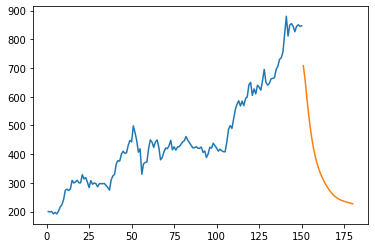

In [64]:
plt.plot(day_new,scaler.inverse_transform(df1[1376:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

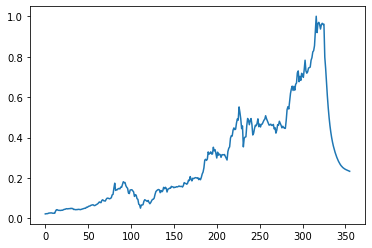

In [65]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])